<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

### Import  data

In [2]:
# Change directories into the folder that contains the data I want to use
%cd /Users/stevenchase/Desktop/Steven/Computer_Science/Lambda/DS_Unit_4_Sprint_1_NLP/module1-text-data

/Users/stevenchase/Desktop/Steven/Computer_Science/Lambda/DS_Unit_4_Sprint_1_NLP/module1-text-data


In [3]:
# Check that I am in the correct folder
%pwd

'/Users/stevenchase/Desktop/Steven/Computer_Science/Lambda/DS_Unit_4_Sprint_1_NLP/module1-text-data'

In [4]:
# Import data

import pandas as pd

df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [6]:
# Look at the shape
df.shape

(28332, 24)

In [5]:
# Examine the head of the data
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
# Pull out the only column we need, the text reviews
df_review = df['reviews.text']
df_review.head()

0    I order 3 of them and one of the item is bad q...
1    Bulk is always the less expensive way to go fo...
2    Well they are not Duracell but for the price i...
3    Seem to work as well as name brand batteries a...
4    These batteries are very long lasting the pric...
Name: reviews.text, dtype: object

In [9]:
# Expand the column size so we can see more text, see if it needs cleaning

pd.set_option('display.max_colwidth', -1)
df_review.head(35)

/Users/stevenchase/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0     I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.                                                                                                                                                                                                                                                                            
1     Bulk is always the less expensive way to go for products like these                                                                                                                                                                                                                                                                                                                                                    
2     Well they are not Duracell but for the price i am happy.                                                                                                              

### Clean Text Data

In [ ]:
# This Text was actually perfectly clean. No cleaning necessary.

'''
Optionally, use BeautifulSoup to clean html
or write clean the column with pure python : 
    df['text_column'] = df['text_column'].apply(lambda x: x.replace("<br />", ""))
'''

### Tokenization
Options
- Spacy
- Pure Python (custom function)
- Gensim

In [10]:
# Use Spacy to create tokens

import spacy
nlp = spacy.load('en_core_web_lg')

In [12]:
# Create list of tokens
# Use Lemmas as out tokens

tokens = []

for doc in nlp.pipe(df_review):
    
    doc_tokens = []
    
    for token in doc:
        if(token.is_stop == False) and (token.pos_ != 'PRON') and (token.is_punct == False):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [22]:
# Look at one example of the tokens
tokens[0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

In [13]:
# Sanity check that the list of tokens is the same length as the original list of the reviews

len(tokens) == df_review.shape[0]

True

### Genism LDA Topic Modeling
- Tokenize before creating model

In [24]:
# Imports

import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [33]:
# You instantiate the corpora at the same time as creating the dictionary
# The dictionary contains the words and their cooresponding ids (integers that makes computations easier)

id2word = corpora.Dictionary(tokens)

In [34]:
# How many tokens there are
len(id2word.keys())

9705

In [35]:
# Filter out those that appear in less than n amount of documents
# Filter out those that appear in more than 95% of the documents

id2word.filter_extremes(no_below= 100, no_above= 0.95)

In [36]:
# Look at the new length of the amount of filtered tokens
len(id2word.keys())

489

In [37]:
# Counts the number of occurrences of each word
# Returns the word ID and the count of that word

corpora = [id2word.doc2bow(doc) for doc in tokens]

In [39]:
# Length is the same as the number of reviews
len(corpora)

28332

In [83]:
# Lda model will use the corpora we've created to divide the reviews into n amount of topics that we decide
# Later we can use a systamatic way of deciding how many topics to divide it into

# Updated to do 17 topics, the ideal split calculated at the bottom of the notebook

lda = LdaMulticore(corpus = corpora,
                  id2word = id2word,
                  num_topics = 17,
                  passes = 50)

In [84]:
# Look at the topics the model created
lda.print_topics()

[(0,
  '0.197*"use" + 0.184*"easy" + 0.146*"love" + 0.091*"gift" + 0.053*"purchase" + 0.051*"buy" + 0.043*"enjoy" + 0.042*"Christmas" + 0.032*"item" + 0.029*"wife"'),
 (1,
  '0.059*"light" + 0.040*"reader" + 0.033*"music" + 0.031*"use" + 0.030*"reading" + 0.028*"read" + 0.028*"easy" + 0.027*"device" + 0.027*"Amazon" + 0.026*"internet"'),
 (2,
  '0.242*"kindle" + 0.110*"excellent" + 0.084*"new" + 0.063*"phone" + 0.059*"upgrade" + 0.052*"travel" + 0.051*"web" + 0.044*"love" + 0.038*"version" + 0.036*"second"'),
 (3,
  '0.142*"kid" + 0.093*"game" + 0.071*"play" + 0.058*"love" + 0.052*"great" + 0.049*"app" + 0.042*"download" + 0.036*"movie" + 0.034*"watch" + 0.027*"child"'),
 (4,
  '0.098*"Kindle" + 0.061*"Fire" + 0.051*"charge" + 0.027*"Amazon" + 0.023*"new" + 0.020*"time" + 0.020*"come" + 0.020*"day" + 0.017*"hold" + 0.016*"purchase"'),
 (5,
  '0.128*"screen" + 0.079*"size" + 0.072*"nice" + 0.059*"perfect" + 0.045*"feature" + 0.041*"easy" + 0.030*"picture" + 0.030*"big" + 0.029*"small" +

In [85]:
# Make sure the correct amount of topics were created (this didn't happen for anything above 20)

len(lda.print_topics())

17

In [86]:
# Clean the output
# This is a standard output, so you can recyle the code to clean it

import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [87]:
words[0]

['use',
 'easy',
 'love',
 'gift',
 'purchase',
 'buy',
 'enjoy',
 'Christmas',
 'item',
 'wife']

In [88]:
# Create names for each topic
# Simple way is to take just the first 5 words and use it as the label

topics = [' '.join(t[0:5]) for t in words]

In [89]:
# Print them out in a readable way

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
use easy love gift purchase

------ Topic 1 ------
light reader music use reading

------ Topic 2 ------
kindle excellent new phone upgrade

------ Topic 3 ------
kid game play love great

------ Topic 4 ------
Kindle Fire charge Amazon new

------ Topic 5 ------
screen size nice perfect feature

------ Topic 6 ------
tablet great use Amazon video

------ Topic 7 ------
good recommend price quality product

------ Topic 8 ------
work great fine expect problem

------ Topic 9 ------
case learn get grandson pay

------ Topic 10 ------
battery long brand life buy

------ Topic 11 ------
old year love buy 2

------ Topic 12 ------
buy love happy time daughter

------ Topic 13 ------
book read app fire need

------ Topic 14 ------
great price product value fast

------ Topic 15 ------
price well beat worth low

------ Topic 16 ------
battery Amazon use buy iPad



### Interpret LDA Results

In [74]:
# Visualization that maps the topics proximities
# Also tells what terms are most important to the topic distribution 

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [90]:
# Create visualization
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16    -0.094611 -0.244140  1       1        12.952985
10     0.038311 -0.207546  2       1        7.966964 
3     -0.063515  0.129189  3       1        7.763289 
6      0.008397 -0.076388  4       1        7.396234 
4     -0.093903 -0.147526  5       1        7.087670 
11    -0.186508  0.162316  6       1        6.830753 
1     -0.084846 -0.135077  7       1        5.853786 
13    -0.103851 -0.130219  8       1        5.397281 
5     -0.097195  0.078245  9       1        5.177578 
0     -0.175007  0.194843  10      1        5.029417 
7      0.318378  0.043902  11      1        5.018942 
14     0.359201  0.083168  12      1        4.944059 
12    -0.129822  0.122710  13      1        4.554029 
15     0.161859 -0.144311  14      1        4.485343 
8      0.235190  0.101935  15      1        3.670147 
9     -0.076855 -0.014172  16      1        3.247280 
2     -0.015223  0.183073  17      1        2.624246 , topic_info=        Term         Freq        Total Category  logprob  loglift
27   good     6943.000000  6943.000000  Default  30.0000  30.0000
17   great    9369.000000  9369.000000  Default  29.0000  29.0000
454  tablet   7405.000000  7405.000000  Default  28.0000  28.0000
2    battery  9366.000000  9366.000000  Default  27.0000  27.0000
6    work     4595.000000  4595.000000  Default  26.0000  26.0000
..    ...             ...          ...      ...      ...      ...
483  hd       0.060883     0.981128     Topic17 -11.6248  0.8606 
359  wish     18.154041    295.751892   Topic17 -5.9271   0.8497 
68   love     300.089996   6340.546875  Topic17 -3.1219   0.5897 
203  storage  20.087980    381.233490   Topic17 -5.8259   0.6971 
185  option   17.696032    341.641876   Topic17 -5.9527   0.6800 

[703 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
205   1      0.299267  1    
205   6      0.626842  1    
205   8      0.072795  1    
132   1      0.214771  10   
132   6      0.648016  10   
...  ..           ...  ..   
279   6      0.026991  yes  
279   13     0.386867  yes  
346   3      0.973898  young
346   5      0.023374  young
378   9      0.994742  yr   

[1347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 11, 4, 7, 5, 12, 2, 14, 6, 1, 8, 15, 13, 16, 9, 10, 3])

#### Create table of the distribution of topic in each document in corpus

In [91]:
# create a list of distibutions of topics in for each document
distro = [lda[d] for d in corpora]

In [92]:
# Create function that adds zeros to topics that don't appear in the document, allows you to fill out df

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [93]:
# Convert above output to readable pandas df
doc_topics = pd.DataFrame.from_records(new_distro)

# Use the labels we created for the topics by using the first 5 words
doc_topics.columns = topics

In [94]:
# Look at the resulting df
doc_topics.head()

,use easy love gift purchase,light reader music use reading,kindle excellent new phone upgrade,kid game play love great,Kindle Fire charge Amazon new,screen size nice perfect feature,tablet great use Amazon video,good recommend price quality product,work great fine expect problem,case learn get grandson pay,battery long brand life buy,old year love buy 2,buy love happy time daughter,book read app fire need,great price product value fast,price well beat worth low,battery Amazon use buy iPad
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136027,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.753677,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676465,0.000000,0.00000,0.000000,0.176473,NaN,NaN
2,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.26471,0.014706,0.264711,0.264692,0.014706
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.373772,0.000000,0.00000,0.000000,0.000000,NaN,0.312503
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551720,0.000000,0.00000,0.000000,0.301221,NaN,NaN


In [95]:
# Add a column that tells us the primary topic of each review

doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

#### From here you can do a bunch of data exploration as usual to answer any questions

In [96]:
# What are the most popular topics?
doc_topics['primary_topic'].value_counts()

battery long brand life buy             3630
price well beat worth low               3228
kid game play love great                2310
great price product value fast          2121
good recommend price quality product    2053
use easy love gift purchase             1993
old year love buy 2                     1892
tablet great use Amazon video           1735
Kindle Fire charge Amazon new           1443
buy love happy time daughter            1311
work great fine expect problem          1256
light reader music use reading          1256
screen size nice perfect feature        1182
book read app fire need                 1181
battery Amazon use buy iPad             1013
case learn get grandson pay             408 
kindle excellent new phone upgrade      320 
Name: primary_topic, dtype: int64

### Selecting the Number of Topics
- Will implement in model above

In [64]:
# Create a function that iterates and splits the dictionary into up to as many topics as you limit it to
# Then it will calculate how coherent (accurately it covers/ divides the dictionary) each split is

# The first few splits will have the highest coherence, but that doesn't help us because it is only spliting
# the dictionary into a few topics.


from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [65]:
### Can take a long time to run.

# Calculate the coherence values for each number of topics up to n topics

coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [66]:
# Convert it to a pandas df, you can look at the df but it won't tell you much
topic_coherence = pd.DataFrame.from_records(coherence_values)

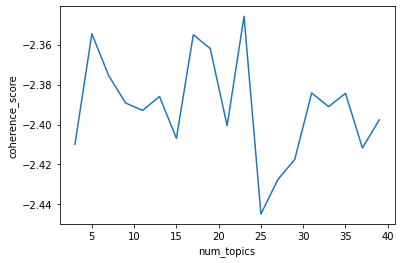

In [67]:
# Create visualization that shows the coherence for each split

import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

##### Based on the graph above, it would be best to split the dictionary into ~17 topics
- max number of topics this dictionary can be split into is 20 

### Questions to answer from the processed data
- 

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling